C:\Users\Srinivasan M\AppData\Local\Temp\ipykernel_13036\3221594614.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


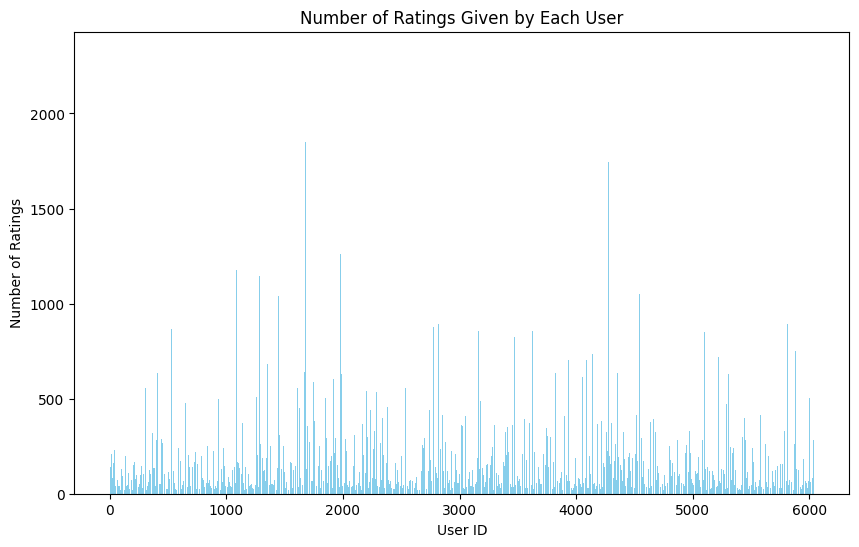

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("ratings.csv")  # Repl.ace "your_dataset.csv" with the path to your dataset

# Calculate count of ratings given by each user
user_rating_count = data.groupby('UserID')['Rating'].count()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(user_rating_count.index, user_rating_count.values, color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings Given by Each User')
plt.show()


In [2]:
# Filter users with more than 50 ratings
high_rating_users = user_rating_count[user_rating_count > 50]

# Create a dictionary to store count of ratings for each user
ratings_dict = dict(zip(high_rating_users.index, high_rating_users.values))

# Copy ratings for users with more than 50 ratings to a new file
output_filename = "high_rating_users_ratings.csv"
with open(output_filename, 'w') as output_file:
    # Write header
    output_file.write("UserID,MovieID,Rating,Timestamp\n")
    
    # Filter data for high rating users and write to the output file
    for index, row in data.iterrows():
        if row['UserID'] in ratings_dict:
            output_file.write(f"{row['UserID']},{row['MovieID']},{row['Rating']},{row['Timestamp']}\n")
